# 1. Histogramas

In [99]:
"""This function takes a data array <vec> and a number of bins n_hist and returns an array with length = n_hist with the distribution of data.
If n_hist is not provided the default value is 100."""
function super_histograma(vec::Array,n_hist=100)
    N_ord = sort(vec)
    
    dx = (N_ord[end]-N_ord[1])/n_hist
    x_1 = N_ord[1]

    histo = zeros(n_hist)
      
    for k = 1 : length(N_ord)
        
        x_1 = N_ord[1]
        
        for j = 1 : length(histo)
            
            x_2 = x_1 + dx
            
            if N_ord[k] >= x_1 && N_ord[k] <= x_2
                
                histo[j] += 1
                break
                
            else
                x_1 += dx
            
            end
        end
    end
    return histo
end

super_histograma (generic function with 2 methods)

Nuestra función está bien documentada. Veamos esto:

In [100]:
?super_histograma

search: super_histograma super_histograma2



This function takes a data array <vec> and a number of bins n_hist and returns an array with length = n_hist with the distribution of data. If n_hist is not provided the default value is 100.

This function takes a data array <vec> and a number of bins n_hist and returns an array with length = n_hist with the distribution of data.


Probemos ahora con un vector `M` de ~ 10,000 entradas.

In [101]:
M = randn(10000);

Saquemos el histograma de `M` con nuestra gran función `super_histograma()`. 

In [102]:
h = super_histograma(M,100)

100-element Array{Float64,1}:
 1.0
 1.0
 3.0
 0.0
 0.0
 0.0
 0.0
 4.0
 4.0
 4.0
 5.0
 4.0
 8.0
 ⋮  
 0.0
 6.0
 3.0
 3.0
 2.0
 1.0
 1.0
 1.0
 2.0
 0.0
 0.0
 1.0

Finalmente, grafiquemos el histograma de `M`.

**Nota:** Se graficó histograma vs rango($n_{hist}$) con fines ilustrativos solamente.

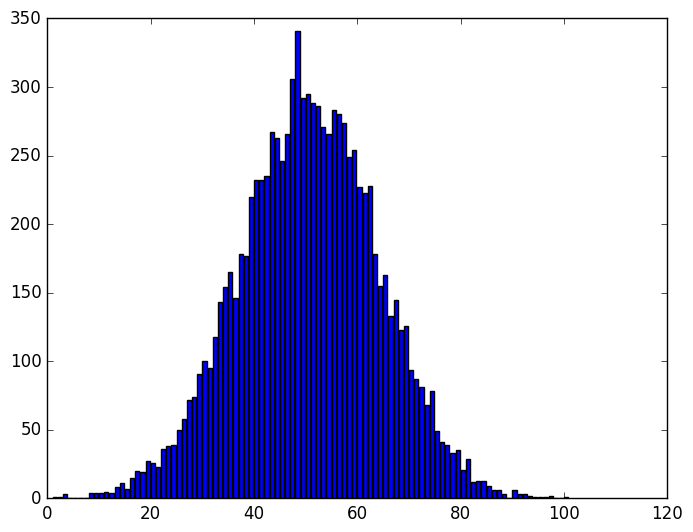

In [103]:
using PyPlot
bar(1:100,h);

# 3. Método de Simpson para integrar

El *método de Simpson* es un método de integración numérica para la aproximación de integrales definidas en un intervalo *(a,b)*.

Sigue esta forma:
$$\int_a^b f(x)dx \approx \frac{b-a}{6}\left[f(a)+4f\left(\frac{a+b}{2}\right)+f(b)\right]$$
Definiremos ahora la función `simpson()` que nos permitirá aproximar la integral de cualquier función en un intervalo *(a,b)*:

In [104]:
"""This is the Simpson's rule for numerical integration, proposed by mathematician Thomas Simpson.
It accepts as parameters function f and two numbers a,b that define the interval inside which the integral of f will be approximated."""
function simpson(f::Function,a,b)
    integral = (b-a)/6 * (f(a)+4*f((a+b)/2)+f(b));
    return integral
end

simpson (generic function with 1 method)

In [105]:
?simpson

search: simpson



This is the Simpson's rule for numerical integration, proposed by mathematician Thomas Simpson. It accepts as parameters function f and two numbers a,b that define the interval inside which the integral of f will be approximated.


Definamos nuestra función prueba como $f(x) = x^2$.

In [106]:
f(x) = x^2

f (generic function with 1 method)

Sabemos que la integral de $f(x) = x^2$ es $\frac{x^3}{3}$ y, evaluada de 0 a 1, nos da un valor de $\approx 0.333333$. Veamos si nuestra función es acertada.

In [107]:
simpson(f,0,1)

0.3333333333333333

Finalmente veamos que si tomamos el intervalo inverso (i.e., el (1,0)), nos da el negativo de la integral.

In [108]:
simpson(f,1,0)

-0.3333333333333333